# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Importing From Local Database

In [3]:
import mysql.connector as c
import pandas as pd
import numpy as np

mydb = c.connect(host = "localhost", user="root", passwd = "IKPatle12@$", database='mldatabase')
cursor = mydb.cursor()

pdData = pd.DataFrame()

def fetch():

    global pdData

    selectQuery = f"select * from creditData"
    cursor.execute(selectQuery)
    data = cursor.fetchall()
    pdData = pd.DataFrame(data)
    pdData = pdData.drop([0], axis = 1)
    
fetch()

In [56]:
print(pdData[[1, 2, 3]])

             1          2          3
0            0  -1.359807  -0.072781
1            0   1.191857   0.266151
2            1  -1.358354  -1.340163
3            1  -0.966272  -0.185226
4            2  -1.158233   0.877737
...        ...        ...        ...
284802  172786 -11.881118  10.071785
284803  172787  -0.732789  -0.055080
284804  172788   1.919565  -0.301254
284805  172788  -0.240440   0.530483
284806  172792  -0.533413  -0.189733

[284807 rows x 3 columns]


# Data Exploration and Preprocessing

In [4]:
pdData.head()

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
pdData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   1       284807 non-null  int64  
 1   2       284807 non-null  float64
 2   3       284807 non-null  float64
 3   4       284807 non-null  float64
 4   5       284807 non-null  float64
 5   6       284807 non-null  float64
 6   7       284807 non-null  float64
 7   8       284807 non-null  float64
 8   9       284807 non-null  float64
 9   10      284807 non-null  float64
 10  11      284807 non-null  float64
 11  12      284807 non-null  float64
 12  13      284807 non-null  float64
 13  14      284807 non-null  float64
 14  15      284807 non-null  float64
 15  16      284807 non-null  float64
 16  17      284807 non-null  float64
 17  18      284807 non-null  float64
 18  19      284807 non-null  float64
 19  20      284807 non-null  float64
 20  21      284807 non-null  float64
 21  22      28

In [6]:
pdData.describe(include = 'all')

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


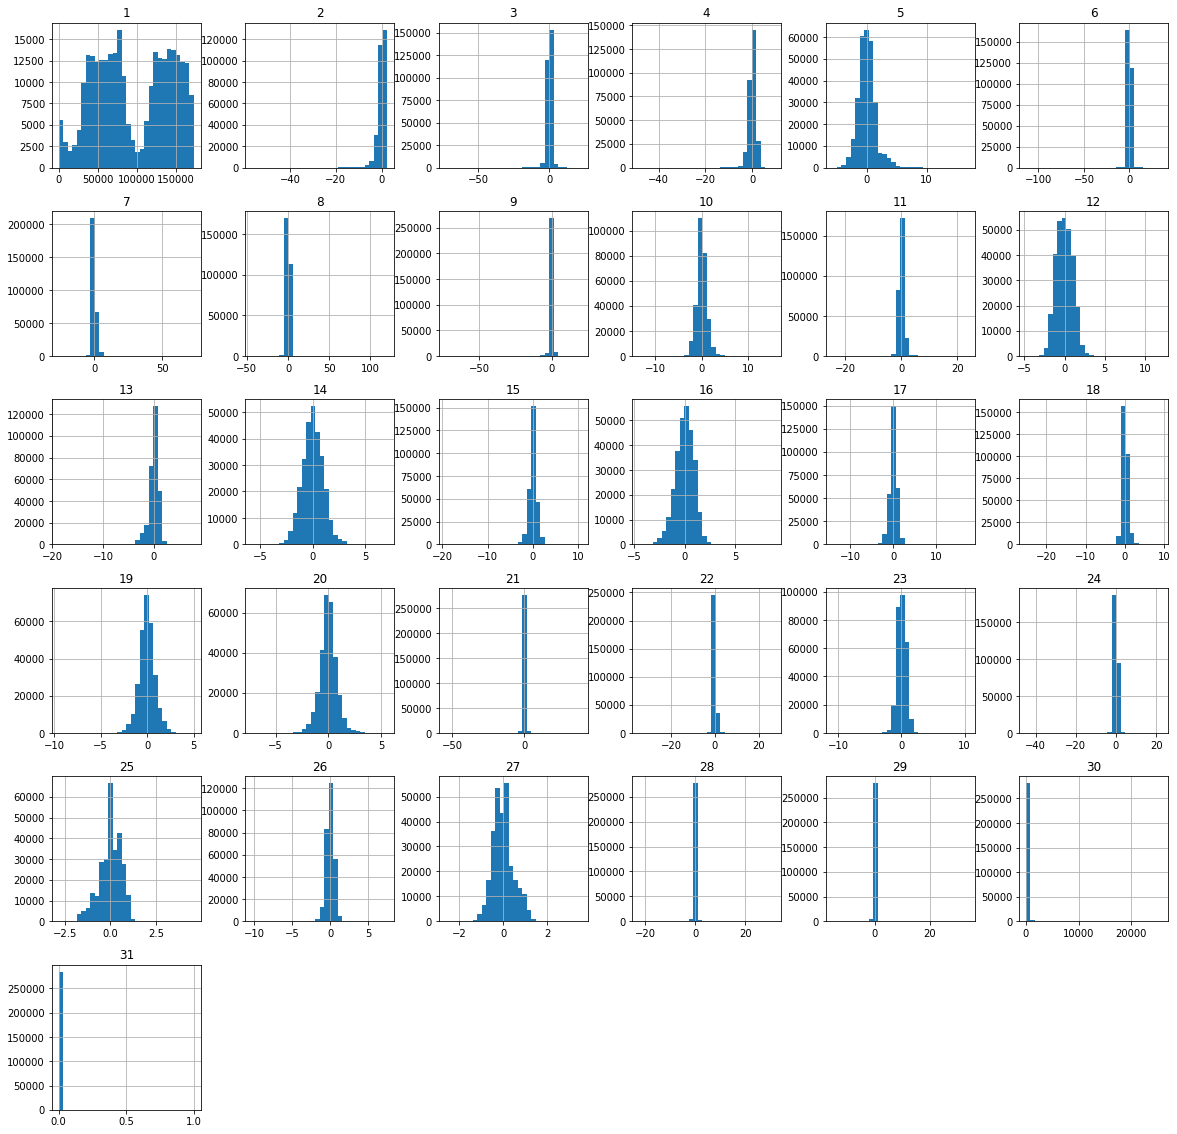

In [7]:
pltt = pdData.hist( figsize = (20, 20), bins = 30)

In [8]:
y = pdData[31]
X = pdData.drop([31], axis = 1 )
print(X.shape)
print(y.shape)

(284807, 30)
(284807,)


Here the amount section is skewed in right

(0.0, 3000.0)

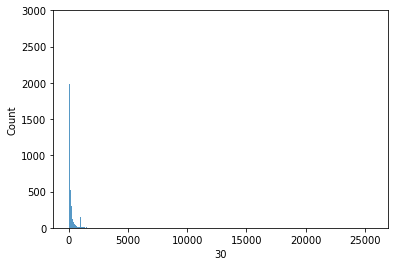

In [9]:
sns.histplot(pdData[30])
plt.ylim(0, 3000)

c:\Users\Tushar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


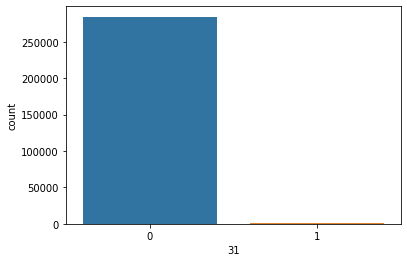

In [10]:
plt = sns.countplot(y)

In [11]:
fraud = sum(pdData[31])
normal = pdData.shape[0]-fraud
print(fraud)
print(normal)

492
284315


# Handeling the imbalance dataset

SMOTE is an Oversampling technique that allows us to generate synthetic samples for our minority categories

In [12]:
from imblearn.over_sampling import SMOTE
smk = SMOTE()
X_balanced, y_balanced = smk.fit_resample(X, y)

c:\Users\Tushar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='31', ylabel='count'>

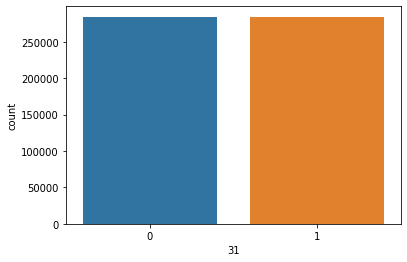

In [13]:
sns.countplot(y_balanced)

Using Undersampling techinque to train SVM model and KNN models as they cache te result in main memory which takes much space.

In [14]:
from imblearn.under_sampling import NearMiss
nm = NearMiss()
xubalanced, yubalanced = nm.fit_resample(X, y)

c:\Users\Tushar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='31', ylabel='count'>

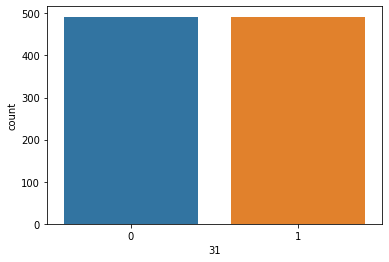

In [15]:
sns.countplot(yubalanced)

# Spliting the data into train and test

In [16]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_balanced, y_balanced, random_state = 38982, test_size = 0.2)

In [17]:
Xutrain, Xutest, yutrain, yutest = train_test_split(xubalanced, yubalanced, random_state = 38982, test_size = 0.2)

# Feature Scaling

In [18]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

scale.fit(Xutrain)

StandardScaler()

In [19]:
scaledXtrain = scale.transform(Xutrain)
scaledXtest = scale.transform(Xutest)

# Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
logClassifier = LogisticRegression(max_iter = 1000)
logClassifier.fit(Xtrain, ytrain)

LogisticRegression(max_iter=1000)

In [21]:
ypred = logClassifier.predict(Xtest)

In [22]:
from sklearn.metrics import average_precision_score
print(average_precision_score(ytest, ypred))

0.9416093876340622


In [23]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(ytest, ypred))

[[54947  1890]
 [ 2993 53896]]


In [24]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     56837
           1       0.97      0.95      0.96     56889

    accuracy                           0.96    113726
   macro avg       0.96      0.96      0.96    113726
weighted avg       0.96      0.96      0.96    113726



# SVM 

In [25]:
from sklearn.svm import SVC
svmClassifier = SVC( kernel ='rbf' )
svmClassifier.fit(scaledXtrain, yutrain)

SVC()

In [26]:
ypred = logClassifier.predict(Xutest)

In [27]:
print(average_precision_score(yutest, ypred))

0.8976964246303244


In [28]:
print(confusion_matrix(yutest, ypred))

[[103   2]
 [ 14  78]]


In [29]:
print(classification_report(yutest, ypred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       105
           1       0.97      0.85      0.91        92

    accuracy                           0.92       197
   macro avg       0.93      0.91      0.92       197
weighted avg       0.92      0.92      0.92       197



Checking our model on bigger test case

In [30]:
ypred = logClassifier.predict(Xtest)

In [31]:
print(average_precision_score(ytest, ypred))

0.9416093876340622


In [32]:
print(confusion_matrix(ytest, ypred))

[[54947  1890]
 [ 2993 53896]]


In [33]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     56837
           1       0.97      0.95      0.96     56889

    accuracy                           0.96    113726
   macro avg       0.96      0.96      0.96    113726
weighted avg       0.96      0.96      0.96    113726



# Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier
decClassifier = DecisionTreeClassifier()
decClassifier.fit(Xtrain, ytrain)

DecisionTreeClassifier()

In [35]:
ypred = decClassifier.predict(Xtest)

In [36]:
print(average_precision_score(ytest, ypred))

0.997455627123798


In [37]:
print(confusion_matrix(ytest, ypred))

[[56720   117]
 [   56 56833]]


In [38]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56837
           1       1.00      1.00      1.00     56889

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



# Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
rfClassifier = RandomForestClassifier(n_estimators = 50)
rfClassifier.fit(Xtrain, ytrain)

RandomForestClassifier(n_estimators=50)

In [40]:
ypred = rfClassifier.predict(Xtest)

In [41]:
print(average_precision_score(ytest, ypred))

0.999841822208162


In [42]:
print(confusion_matrix(ytest, ypred))

[[56828     9]
 [    0 56889]]


In [43]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56837
           1       1.00      1.00      1.00     56889

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



# Artificial Neural Network

In [44]:
import tensorflow as tf

In [45]:
ann = tf.keras.Sequential()
ann.add( tf.keras.layers.Dense( units = Xtrain.shape[1], activation = 'relu') )
ann.add( tf.keras.layers.Dense( units = 40, activation = 'relu') )
ann.add( tf.keras.layers.Dense( units = 40, activation = 'relu') )
ann.add( tf.keras.layers.Dense( units = 1, activation = 'sigmoid') )

In [46]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [47]:
ann.fit(Xtrain, ytrain,  batch_size = 32, epochs = 10)

Epoch 1/10
14216/14216 [==============================] - 32s 2ms/step - loss: 6.5530 - accuracy: 0.8333
Epoch 2/10
14216/14216 [==============================] - 29s 2ms/step - loss: 0.5612 - accuracy: 0.6510
Epoch 3/10
14216/14216 [==============================] - 27s 2ms/step - loss: 0.6411 - accuracy: 0.5809
Epoch 4/10
14216/14216 [==============================] - 27s 2ms/step - loss: 0.3075 - accuracy: 0.8661
Epoch 5/10
14216/14216 [==============================] - 27s 2ms/step - loss: 0.1806 - accuracy: 0.9404
Epoch 6/10
14216/14216 [==============================] - 28s 2ms/step - loss: 0.1623 - accuracy: 0.9463
Epoch 7/10
14216/14216 [==============================] - 29s 2ms/step - loss: 0.1638 - accuracy: 0.9469
Epoch 8/10
14216/14216 [==============================] - 33s 2ms/step - loss: 0.1101 - accuracy: 0.9640
Epoch 9/10
14216/14216 [==============================] - 31s 2ms/step - loss: 0.1061 - accuracy: 0.9655
Epoch 10/10
14216/14216 [==============================

In [48]:
ann.fit(Xtrain, ytrain,  batch_size = 32, epochs = 5)

Epoch 1/5
14216/14216 [==============================] - 33s 2ms/step - loss: 0.1139 - accuracy: 0.9650
Epoch 2/5
14216/14216 [==============================] - 33s 2ms/step - loss: 0.1084 - accuracy: 0.9642
Epoch 3/5
14216/14216 [==============================] - 30s 2ms/step - loss: 0.1035 - accuracy: 0.9655
Epoch 4/5
14216/14216 [==============================] - 33s 2ms/step - loss: 0.1018 - accuracy: 0.9667
Epoch 5/5
14216/14216 [==============================] - 34s 2ms/step - loss: 0.1010 - accuracy: 0.9676


In [49]:
ann.fit(Xtrain, ytrain,  batch_size = 32, epochs = 5)

Epoch 1/5
14216/14216 [==============================] - 33s 2ms/step - loss: 0.0916 - accuracy: 0.9693
Epoch 2/5
14216/14216 [==============================] - 33s 2ms/step - loss: 0.0917 - accuracy: 0.9704
Epoch 3/5
14216/14216 [==============================] - 33s 2ms/step - loss: 0.0905 - accuracy: 0.9714
Epoch 4/5
14216/14216 [==============================] - 33s 2ms/step - loss: 0.0867 - accuracy: 0.9714
Epoch 5/5
14216/14216 [==============================] - 33s 2ms/step - loss: 0.0967 - accuracy: 0.9682


In [50]:
ypred = ann.predict(Xtest)
ypred = ypred>=0.5

3554/3554 [==============================] - 8s 2ms/step


In [51]:
print(average_precision_score(ytest, ypred))

0.9697083785870884


In [52]:
print(confusion_matrix(ytest, ypred))

[[56119   718]
 [ 2030 54859]]


In [53]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     56837
           1       0.99      0.96      0.98     56889

    accuracy                           0.98    113726
   macro avg       0.98      0.98      0.98    113726
weighted avg       0.98      0.98      0.98    113726

